# Les objectifs de ce TP (in situ) sont de:
- (1) Importation de librairies nécessaires au travail
- (2) Charger/Ouvrir un fichier 'netcdf' de données au choix
- (3) Lire et comprendre le contenu et les descriptions associées aux: dimensios, variables et meta data (info sur le produit de données)
- (4) Appeler les variables ou quelques unes
- (5) Faire des figures/plot avec les options suivantes:
    - (A) Extraction d'une région (zone d'analyse)
    - (B) Faire des cartes spatiales dans cette zone:
        - (B-1) Carte spatiale moyenne de variale de choix sur une periode donnée
        - (B-2) Cycle saisonnier dans la zone sélectionnée (boîte d'extraction)
    - (C) Récupérer des données CTD PIRATA de choix est faire:
        - (C-1) Plot de profiles verticaux de température et de salinity
        - (C-2) Calculer la densité et plotter le profil vertical correspondant
    - (D) Estimer des profiles température et salinité, les paramètres suivants:
        - (D-1) La profondeur de la couche de mélange: MLD
        - (D-2) L'épaisseur de la couche isothermal: ILD
        - (D-3) L'épaisseur de la couche de barrière de sel: BLT

### (1) Importation de packages/librairies nécessaires

In [113]:
import numpy as np # for Algebra operations 
import xarray as xr # for data openning and visualization
import matplotlib.pyplot as plt # for figure plotting
import matplotlib.ticker as mticker # pour marker sur plot
import calendar # pour la generation de mois de l'année
# ---- pour les fidure avec Cartopy ------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#-------------------------------------------------------------------------|
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### (2) Charger/Ouvrir un fichier 'netcdf' de données au choix
Nous allons charger et ouvrir un jeu de données de salinité de choix. Ici, nous choisissons le produit suivant sur la plateforme de Copernicus Marine Service: 

- ID: INSITU_GLO_PHY_TS_OA_MY_013_052
- Name: Global Ocean- Delayed Mode gridded CORA- In-situ Observations objective analysis in Delayed Mode
- Dataset : cmems_obs-ins_glo_phy-temp-sal_my_cora-oa_P1M
- Time resolution: monthly for year of 2022

Lien: pour le telechargement: https://data.marine.copernicus.eu/product/INSITU_GLO_PHY_TS_OA_MY_013_052/download

In [15]:
#### Chargement de la donnée:
rep    = "/Users/odilonhoundegnonto/Documents/JupyterNoteBook/Prog/Prog/GGOSSS2025/Data/"
fic_nc = "cmems_obs-ins_glo_phy-temp-sal_my_cora-oa_P1M_PSAL-TEMP_180.00W-179.50E_77.00S-90.00N_1.00m_2022-01-01-2022-12-01.nc"
ds = xr.open_dataset(rep+fic_nc)
# ds

### (3) Lire et comprendre le contenu et les descriptions associées aux: dimensios, variables et meta data.

In [16]:
ds

<xarray.Dataset> Size: 116MB
Dimensions:    (depth: 1, latitude: 1671, longitude: 720, time: 12)
Coordinates:
  * depth      (depth) float32 4B 1.0
  * latitude   (latitude) float64 13kB -77.0 -76.9 -76.8 ... 89.8 89.9 90.0
  * longitude  (longitude) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5
  * time       (time) datetime64[ns] 96B 2022-01-01 2022-02-01 ... 2022-12-01
Data variables:
    PSAL       (time, depth, latitude, longitude) float32 58MB ...
    TEMP       (time, depth, latitude, longitude) float32 58MB ...
Attributes:
    references:                Szekely et al. 2020, doi: 10.17882/46219 
    history:                   20240604T073040L : Creation
    title:                     Global Ocean - Coriolis Observation Re-Analysi...
    source:                    ISAS-V8
    comment:                   V8.0 reference climatology and analysis parame...
    institution:               OceanScope
    Conventions:               CF-1.4
    copernicusmarine_version:  2.2.1

### (4) Appeler les variables ou quelques unes

#### - Appel de la variable: SSS, donc PSAL selon la donnée ouverte

In [25]:
SSS = ds.get('PSAL').squeeze().isel(time=0)
SSS

<xarray.DataArray 'PSAL' (latitude: 1671, longitude: 720)> Size: 5MB
[1203120 values with dtype=float32]
Coordinates:
    depth      float32 4B 1.0
  * latitude   (latitude) float64 13kB -77.0 -76.9 -76.8 ... 89.8 89.9 90.0
  * longitude  (longitude) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5
    time       datetime64[ns] 8B 2022-01-01
Attributes:
    long_name:      Practical salinity
    valid_min:      -26000.0
    units:          PSS-78
    standard_name:  sea_water_salinity
    valid_max:      30000.0

#### - Appel de la variable: SST, donc TEMP selon la donnée ouverte

In [24]:
SST = ds.get('TEMP').squeeze().isel(time=0)
SST

<xarray.DataArray 'TEMP' (latitude: 1671, longitude: 720)> Size: 5MB
[1203120 values with dtype=float32]
Coordinates:
    depth      float32 4B 1.0
  * latitude   (latitude) float64 13kB -77.0 -76.9 -76.8 ... 89.8 89.9 90.0
  * longitude  (longitude) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5
    time       datetime64[ns] 8B 2022-01-01
Attributes:
    long_name:      Temperature 
    valid_min:      -23000.0
    units:          degree_Celsius
    standard_name:  sea_water_temperature
    valid_max:      20000.0

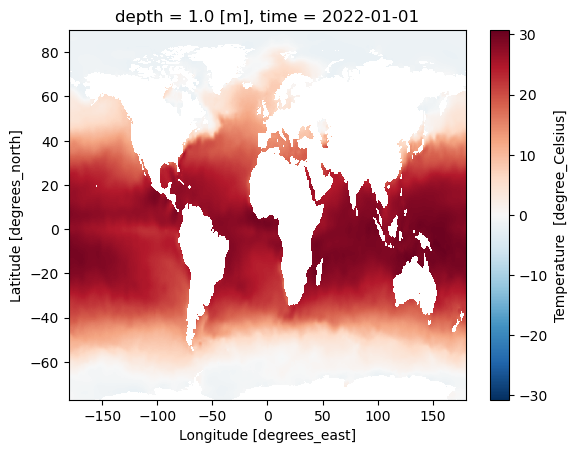

In [26]:
# visualisation simplifiée de la variable de SST à l'aide de la librairie xarray
SST.plot()

### (5) Faire des figures/plot avec les options suivantes:

#### (5) - (A) Extraction d'une région (zone d'analyse)
Les limites chooisies pour le Golfe de Guinnée (GG):
- Longitude: 15˚W à 15˚E
- Latitude: 10˚S à 10˚N

In [50]:
lonmapmin = -15 # 15˚W
lonmapmax = 15 # 15˚E
latmapmin = -10 # 10˚S
latmapmax = 10 # 10˚N

In [51]:
# Pour la salinité
sal = ds.PSAL.sel(longitude=slice(lonmapmin, lonmapmax), latitude=slice(latmapmin, latmapmax)).squeeze()
sal

<xarray.DataArray 'PSAL' (time: 12, latitude: 200, longitude: 61)> Size: 586kB
[146400 values with dtype=float32]
Coordinates:
    depth      float32 4B 1.0
  * latitude   (latitude) float64 2kB -9.9 -9.8 -9.7 -9.6 ... 9.7 9.8 9.9 10.0
  * longitude  (longitude) float64 488B -15.0 -14.5 -14.0 ... 14.0 14.5 15.0
  * time       (time) datetime64[ns] 96B 2022-01-01 2022-02-01 ... 2022-12-01
Attributes:
    long_name:      Practical salinity
    valid_min:      -26000.0
    units:          PSS-78
    standard_name:  sea_water_salinity
    valid_max:      30000.0

In [52]:
# Pour la temperature
temp = ds.TEMP.sel(longitude=slice(lonmapmin, lonmapmax), latitude=slice(latmapmin, latmapmax)).squeeze()
temp

<xarray.DataArray 'TEMP' (time: 12, latitude: 200, longitude: 61)> Size: 586kB
[146400 values with dtype=float32]
Coordinates:
    depth      float32 4B 1.0
  * latitude   (latitude) float64 2kB -9.9 -9.8 -9.7 -9.6 ... 9.7 9.8 9.9 10.0
  * longitude  (longitude) float64 488B -15.0 -14.5 -14.0 ... 14.0 14.5 15.0
  * time       (time) datetime64[ns] 96B 2022-01-01 2022-02-01 ... 2022-12-01
Attributes:
    long_name:      Temperature 
    valid_min:      -23000.0
    units:          degree_Celsius
    standard_name:  sea_water_temperature
    valid_max:      20000.0

#### 5 - (B) Faire des cartes spatiales dans cette zone:
#### 5 - (B-1) Carte moyenne de la SSS:

In [96]:
sal_mean = sal.mean(dim='time')
sal_mean 

<xarray.DataArray 'PSAL' (latitude: 200, longitude: 61)> Size: 49kB
array([[36.41817 , 36.41541 , 36.41389 , ...,       nan,       nan,
              nan],
       [36.404915, 36.402287, 36.4009  , ...,       nan,       nan,
              nan],
       [36.39166 , 36.389168, 36.387917, ...,       nan,       nan,
              nan],
       ...,
       [34.225018, 33.994602, 34.020515, ...,       nan,       nan,
              nan],
       [34.23386 , 34.041714, 34.05415 , ...,       nan,       nan,
              nan],
       [34.25012 , 34.09361 , 34.096363, ...,       nan,       nan,
              nan]], shape=(200, 61), dtype=float32)
Coordinates:
    depth      float32 4B 1.0
  * latitude   (latitude) float64 2kB -9.9 -9.8 -9.7 -9.6 ... 9.7 9.8 9.9 10.0
  * longitude  (longitude) float64 488B -15.0 -14.5 -14.0 ... 14.0 14.5 15.0

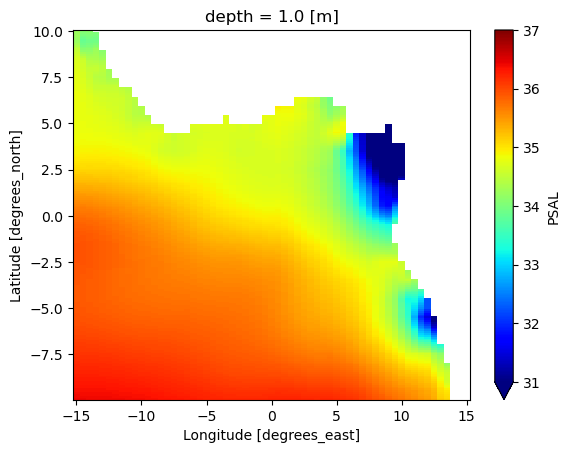

In [97]:
sal_mean.plot(vmin=31,vmax=37,cmap='jet')

#### Maniere plus jolie de fare la même chose :)

In [49]:
lon = sal.longitude
lat = sal.latitude

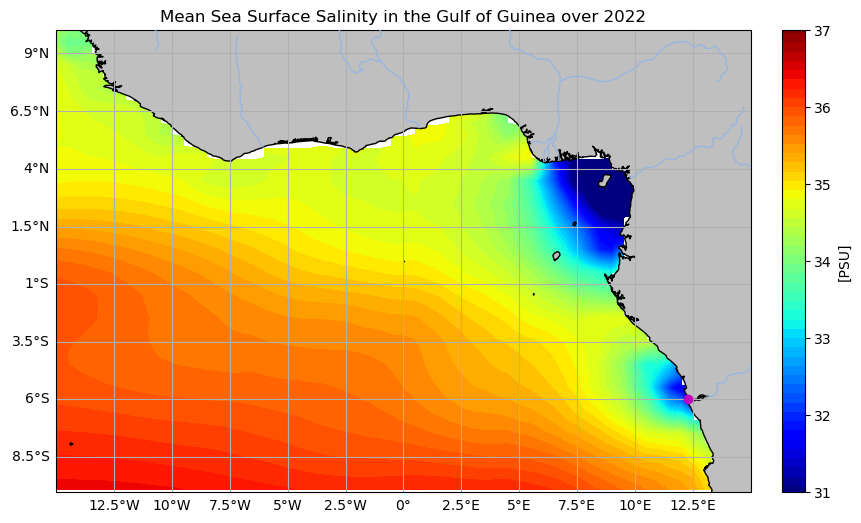

In [125]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=38))
ax.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor = '0.75',zorder=2);ax.coastlines('10m',zorder=2)
ax.add_feature(cfeature.RIVERS,facecolor='blue',zorder=3)
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.xlocator = mticker.FixedLocator(np.arange(lonmapmin-10,lonmapmax+15,2.5))
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k','rotation':0}
gl.yformatter = LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(np.arange(latmapmin-1,latmapmax+1,2.5))
gl.ylabel_style = {'size': 10, 'color': 'k','rotation':0}
#----------------------------------------------------------------------------#
gl.top_labels = False;gl.right_labels = False
#----------------------------------------------------------------------------#
Lev = np.arange(24,37.1,0.12) # manipulation des valeur de contour
plt.title('Mean Sea Surface Salinity in the Gulf of Guinea over 2022')
cb = ax.contourf(lon,lat,sal_mean,cmap='jet',levels=Lev,
                 transform=ccrs.PlateCarree(),zorder=1,vmin=31,vmax=37)## cb.set_clim(vmin=31,vmax=37)
cbar = plt.colorbar(cb,ticks=np.arange(31, 38,1),spacing='proportional',label="[PSU]",fraction=0.033, pad=0.04)
cbar.ax.set_ylim(31,37)

## Add box
ax.plot(12.3,-6,'om',transform=ccrs.PlateCarree(),zorder=4)

#### 5 - (B-2) Carte de la série temporelle de la SSS:

In [111]:
# Définition de la boîte d'intérêt
lonmin = 2.5 
lonmax = 10
latmin = -1
latmax = 4

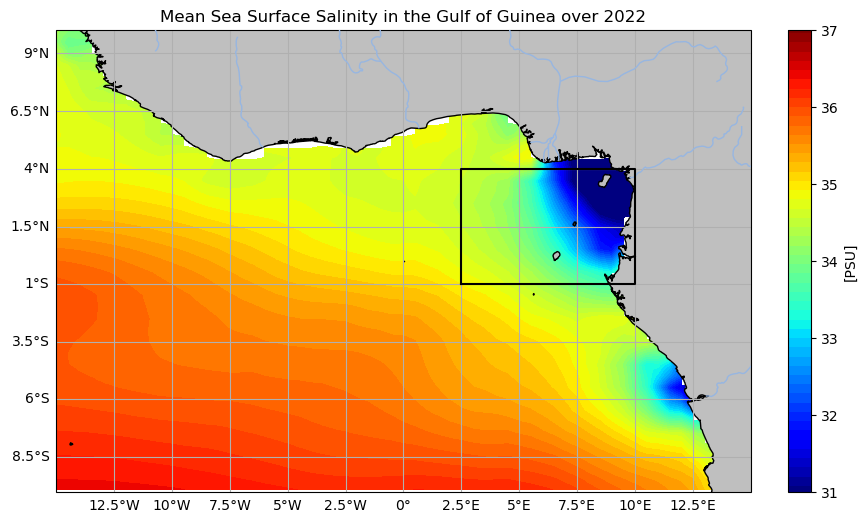

In [110]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=38))
ax.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor = '0.75',zorder=2);ax.coastlines('10m',zorder=2)
ax.add_feature(cfeature.RIVERS,facecolor='blue',zorder=3)
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.xlocator = mticker.FixedLocator(np.arange(lonmapmin-10,lonmapmax+15,2.5))
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k','rotation':0}
gl.yformatter = LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(np.arange(latmapmin-1,latmapmax+1,2.5))
gl.ylabel_style = {'size': 10, 'color': 'k','rotation':0}
#----------------------------------------------------------------------------#
gl.top_labels = False;gl.right_labels = False
#----------------------------------------------------------------------------#
Lev = np.arange(24,37.1,0.12) # manipulation des valeur de contour
plt.title('Mean Sea Surface Salinity in the Gulf of Guinea over 2022')
cb = ax.contourf(lon,lat,sal_mean,cmap='jet',levels=Lev,
                 transform=ccrs.PlateCarree(),zorder=1,vmin=31,vmax=37)## cb.set_clim(vmin=31,vmax=37)
cbar = plt.colorbar(cb,ticks=np.arange(31, 38,1),spacing='proportional',label="[PSU]",fraction=0.033, pad=0.04)
cbar.ax.set_ylim(31,37)

## Add box
ax.plot([lonmin,lonmax,lonmax,lonmin,lonmin],[latmin,latmin,latmax,latmax,latmin],'-k',transform=ccrs.PlateCarree(),zorder=4)

In [112]:
# calcul de la moyenne mensuelle dans la boîte d'intérê3t
sal_time_series = sal.sel(longitude=slice(lonmin, lonmax),
                          latitude=slice(latmin, latmax)).mean(dim=['longitude','latitude'])

In [115]:
mois = list(calendar.month_name)[1:]  # Ignore l'élément vide au début
mois

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

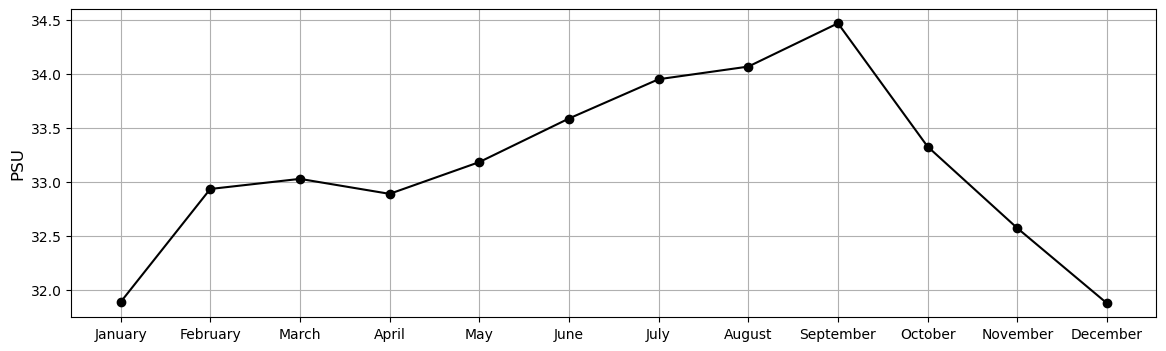

In [138]:
fig = plt.figure(figsize=[14,4]);
plt.plot(mois,sal_time_series,'o-k')
plt.ylabel("PSU",fontsize = 12)
plt.grid()